In [190]:
import numpy as np
from math import *

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.io as sio
from scipy.fftpack import dct, idct

from numpy.linalg import norm

In [191]:
def hanning(L):
    return np.asarray([0.5* (1 - cos(x)) for x in (2 * pi * np.asarray(list(range(1,L+1)))) / (L+1)])

In [243]:
L = 128
dcttype = 4
torque = sio.loadmat('../../datasets/CS2018_12_14/Torque.mat')
current = sio.loadmat('../../datasets/CS2018_12_14/Current.mat')
time = sio.loadmat('../../datasets/CS2018_12_14/t.mat')['t']
y = current['Current'][:,0]
N = y.shape[0]

In [244]:
w = hanning(L)
c = np.zeros((N-L+1,L))

In [245]:
for n in range(0,N-L+1):
    Y = y[n:n+L]
    c[n, :] = w * Y.flatten()

In [246]:
c = dct(c, type=dcttype, n=L, norm='ortho')

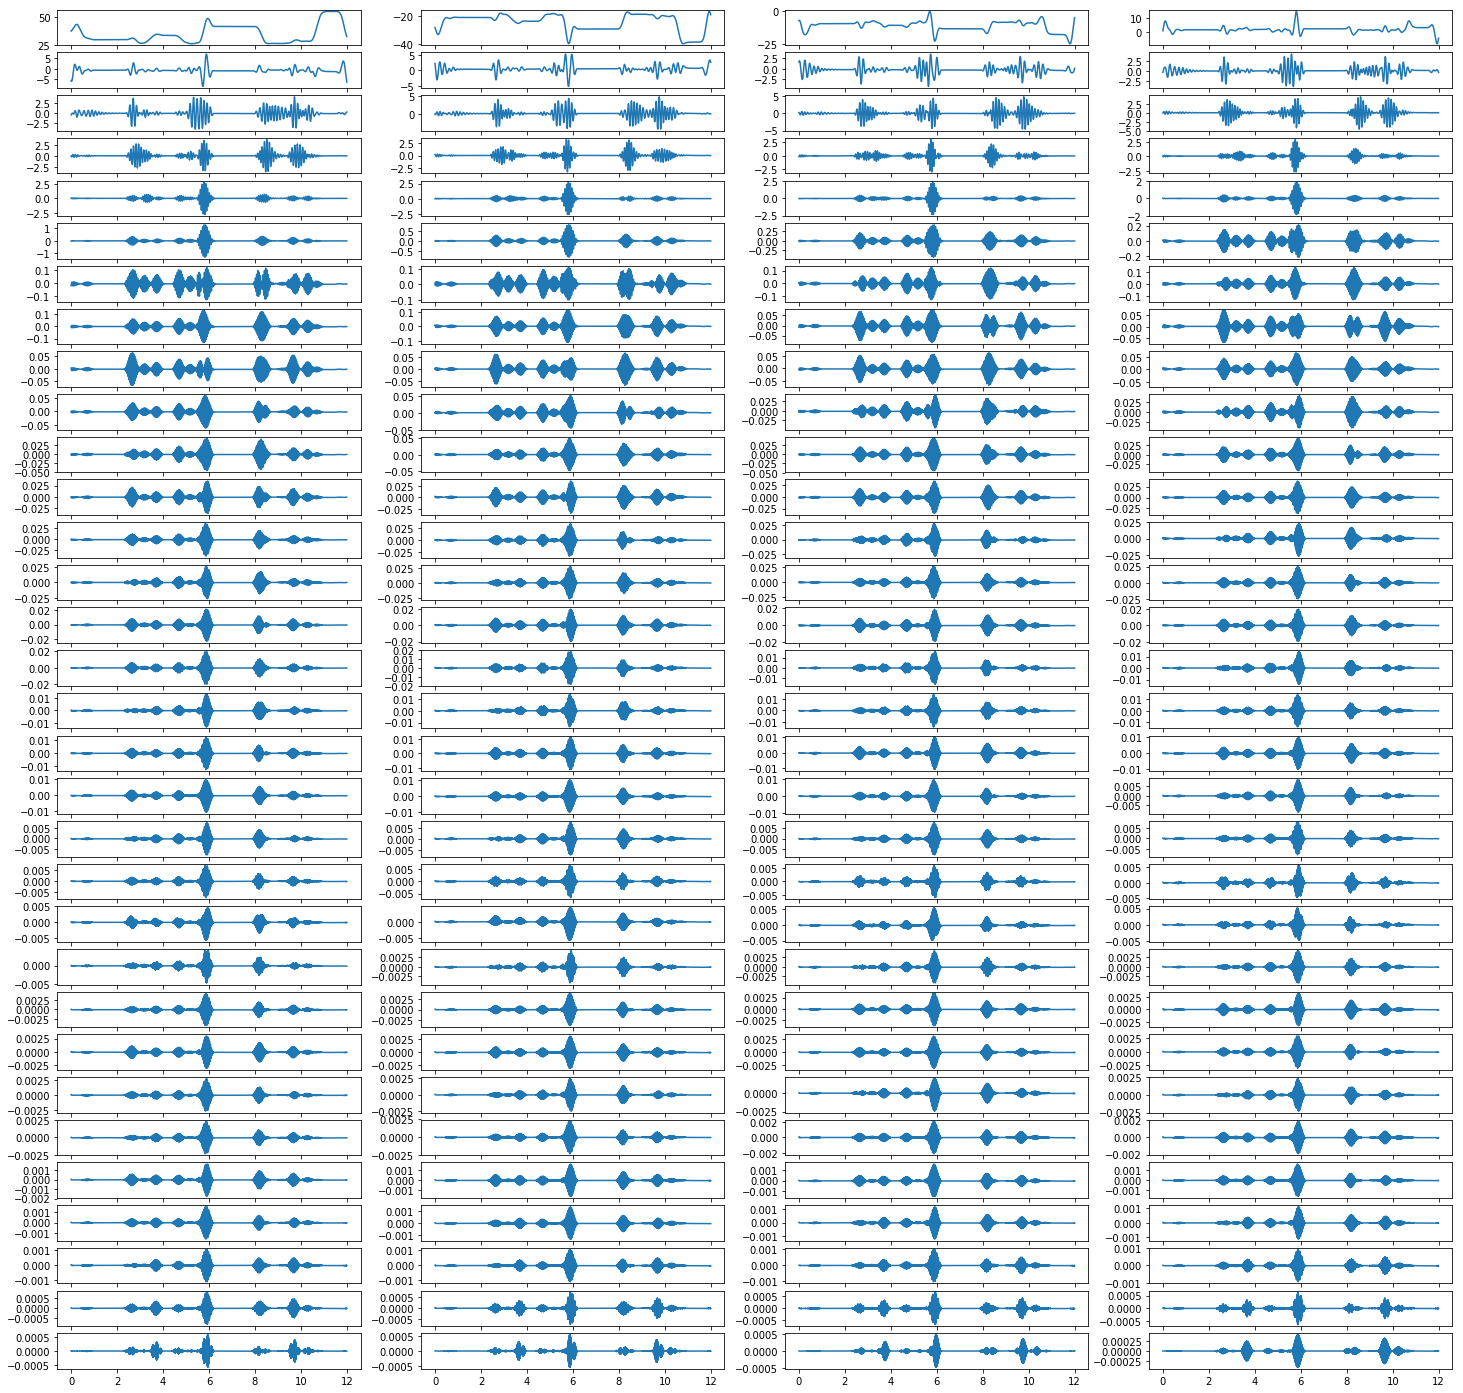

In [247]:
st = 0
en = 12
start = int(st / 0.005)
end = int(en / 0.005)

f = plt.figure(figsize=(25,25))

nrow, ncol = c.shape[1]//4, 4
for i in range(1, c.shape[1]+1):
    f.add_subplot(nrow, ncol, i)
    plt.plot(time[start:end], c[start:end,i-1])



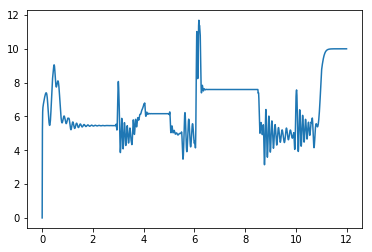

In [238]:
plt.plot(time[start:end], y[start:end])

In [239]:
N = c.shape[0] + L - 1
invc = idct(c, type=dcttype, n=L, norm='ortho').T
cf = np.fliplr(invc)
yr = np.zeros((N))

In [240]:
for nn in range(N-L,-L,-1):
    d = np.diag(cf, nn)
    if nn >= 0:
        ww = w[:d.shape[0]]
    else:
        ww = w[-nn:L]
      
    yr[N-L-nn] = np.dot(ww, d / norm(ww)**2)

In [241]:
norm(y.flatten()-yr)

2.306272327536579e-12

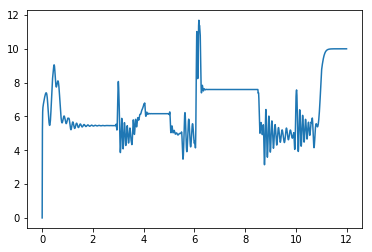

In [242]:
plt.plot(time[start:end], yr[start:end])

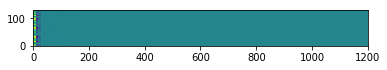

In [224]:
plt.imshow(np.flipud(c), extent=[0,1200,0,128])